In [126]:
# import libraries

import numpy as np
import cv2

import PIL.Image as Image

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub    

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [127]:
IMAGE_SIZE = (224, 224)

classifier = hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SIZE + (3,))

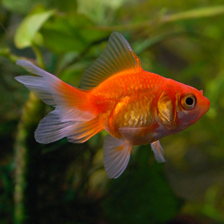

In [128]:
goldfish = Image.open('goldfish.jpg').resize(IMAGE_SIZE)
goldfish

In [129]:
goldfish = np.array(goldfish)/255
goldfish.shape

(224, 224, 3)

In [130]:
goldfish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [131]:
#goldfish = np.expand_dims(goldfish, axis=0)
#goldfish.shape

In [132]:
#goldfish

In [133]:
result = classifier(goldfish[np.newaxis, ...])
print(result)
result.shape

tf.Tensor(
[[ 0.22101447  2.0474923   9.622562   ... -1.4621569  -0.2814652
  -0.25984892]], shape=(1, 1001), dtype=float32)


TensorShape([1, 1001])

In [134]:
predicted_label = np.argmax(result[0])
print(predicted_label)

2


In [135]:
with open('ImageNetLabels.txt', 'r') as f:
    labels = [label.strip() for label in f]
    
labels[predicted_label]

'goldfish'

In [136]:
data_dir = '/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos'
data_dir

'/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos'

In [137]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos')

In [138]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/21805938544_bf6bb0e4bc.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/9204730092_a7f2182347.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/9529916092_de70623523_n.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/3356112863_75da8bca2c_m.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/5626895440_97a0ec04c2_n.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/daisy/10555749515_13a12a026e.jpg'),
 PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml

In [139]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [140]:
roses = list(data_dir.glob('roses/*'))

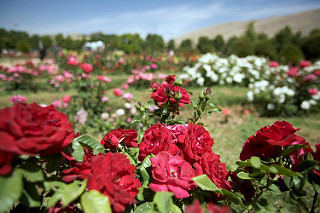

In [141]:
Image.open(str(roses[100]))

In [142]:
tulips = list(data_dir.glob('tulips/*'))

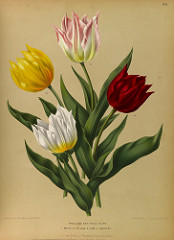

In [143]:
Image.open(str(tulips[0]))

In [144]:
flower_image_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'tulips': list(data_dir.glob('tulips/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'dandelion': list(data_dir.glob('dandelion/*'))
    
}



In [145]:
flower_imge_label_dir = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [146]:
flower_image_dict['roses'][0]

PosixPath('/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/Deep_Learning_YT/Flower_image_classification_DL/datasets/flower_photos/roses/2409069862_b128ee2a71.jpg')

In [147]:
img = cv2.imread(str(flower_image_dict['roses'][0]))
img.shape

(333, 500, 3)

In [148]:
cv2.resize(img, (IMAGE_SIZE)).shape

(224, 224, 3)

In [149]:
X,Y = [],[]
for flower, label in flower_imge_label_dir.items():
    for img_path in flower_image_dict[flower]:
        img = cv2.imread(str(img_path))
        img = cv2.resize(img, (IMAGE_SIZE))
        X.append(img)
        Y.append(label)
        


In [150]:

print(X.shape)
print(X)

AttributeError: 'list' object has no attribute 'shape'

In [151]:
X = np.array(X)
Y = np.array(Y)

print(X.shape)
print(X)

(3670, 224, 224, 3)
[[[[133 141 154]
   [140 146 155]
   [142 150 160]
   ...
   [ 32  46  64]
   [ 32  43  63]
   [ 31  46  63]]

  [[127 138 151]
   [136 146 155]
   [140 150 160]
   ...
   [ 31  44  66]
   [ 31  46  63]
   [ 29  46  62]]

  [[127 137 150]
   [137 146 157]
   [140 150 160]
   ...
   [ 32  46  64]
   [ 32  47  62]
   [ 28  46  63]]

  ...

  [[136 141 140]
   [134 140 139]
   [132 137 136]
   ...
   [  0  10  33]
   [  0  10  25]
   [  2  11  35]]

  [[134 138 139]
   [133 137 138]
   [130 134 135]
   ...
   [  0  10  32]
   [  0   9  26]
   [  2   9  32]]

  [[131 135 136]
   [132 136 137]
   [130 134 135]
   ...
   [  1  10  30]
   [  0   9  27]
   [  0   8  31]]]


 [[[116 116 116]
   [116 116 116]
   [117 117 117]
   ...
   [141 141 141]
   [145 145 145]
   [153 153 153]]

  [[117 117 117]
   [117 117 117]
   [118 118 118]
   ...
   [155 155 155]
   [161 161 161]
   [160 160 160]]

  [[119 119 119]
   [119 119 119]
   [119 119 119]
   ...
   [164 164 164]
   [165 

In [152]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [153]:
X_train_scaled = X_train/255
Y_train_scaled = Y_test/255

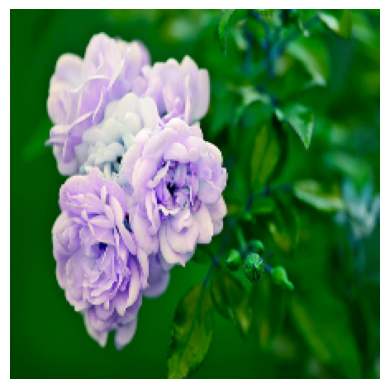

In [78]:
plt.axis('off')
plt.imshow(X[5])

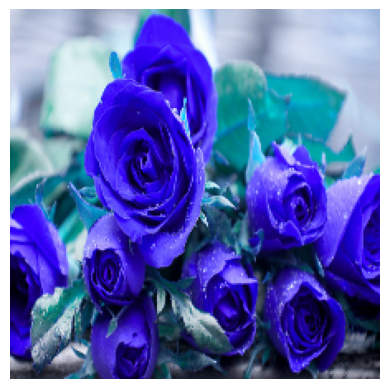

In [79]:
plt.axis('off')
plt.imshow(X[500])

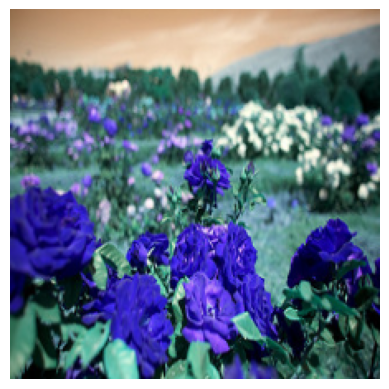

In [80]:
plt.axis('off')
plt.imshow(X[100])

In [154]:
result = classifier(np.array([X[100]/255])) # this from the intital image
print(result)

tf.Tensor(
[[ 0.24491027 -1.3477639   0.6249662  ...  0.29397807 -0.6188392
  -0.7024926 ]], shape=(1, 1001), dtype=float32)


In [155]:
# we need took from the scaled image
result = classifier(X_train_scaled[0][np.newaxis, ...])

In [156]:
print(result)

tf.Tensor(
[[ 0.20462385 -0.06303808  1.4943986  ... -0.773958    1.0743194
   0.23659228]], shape=(1, 1001), dtype=float32)


In [157]:
predicted_label = np.argmax(result[0])
print(predicted_label)

697


In [158]:
labels[predicted_label]

'paintbrush'

In [167]:

feature_extractor_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

number_of_flower = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(number_of_flower,)
])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x797b7e815250> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)

In [166]:
'''
number_of_flower = 5
model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(number_of_flower,)
])

model.summary()

'''

'\nnumber_of_flower = 5\nmodel = tf.keras.Sequential([\n    pretrained_model_without_top_layer,\n    tf.keras.layers.Flatten(),\n    tf.keras.layers.Dense(number_of_flower,)\n])\n\nmodel.summary()\n\n'

In [161]:
number_of_flower = 5

mobilenet_v2 = hub.load("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4")

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(224, 224, 3)),
    tf.keras.layers.Lambda(lambda x: mobilenet_v2(x)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(number_of_flower)
])

model.summary()

/home/muhammed-shafeeh/AI_ML/Ai-and-Ml/.venv/lib/python3.12/site-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 5)              │         6,405 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,405 (25.02 KB)

 Trainable params: 6,405 (25.02 KB)

 Non-trainable params: 0 (0.00 B)

In [162]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

model.fit(X_train_scaled, Y_train, epochs=5)

Epoch 1/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 29s 294ms/step - accuracy: 0.5613 - loss: 1.1549
Epoch 2/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.8587 - loss: 0.4380
Epoch 3/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 283ms/step - accuracy: 0.8948 - loss: 0.3276
Epoch 4/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 24s 282ms/step - accuracy: 0.9136 - loss: 0.2775
Epoch 5/5
86/86 ━━━━━━━━━━━━━━━━━━━━ 25s 285ms/step - accuracy: 0.9237 - loss: 0.2484


In [163]:
print(np.unique(Y_train))


[0 1 2 3 4]


In [165]:
X_test_scaled = X_test/255
model.evaluate(X_test_scaled, Y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 282ms/step - accuracy: 0.8798 - loss: 0.3572


[0.34017500281333923, 0.8845316171646118]